In [1]:
%load_ext blackcellmagic

<h2> Exploratory Data Analysis
</h2>

<h4> We have a dataset regarding songs, their genre and some features. The genre is the thing we are trying to predict. We will have a look on our dataset in general and we will try to find some predictive value in the dataset by visually exploring it.

In [5]:
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
from loguru import logger
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

sys.path.insert(0, "..")

from src.data.make_dataset import create_labeled_data

root = Path("..")

In [6]:
df = create_labeled_data()

In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration
count,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,88160.000000,8.816000e+04,88160.000000,88160.000000
mean,0.533840,0.643178,5.326146,-9.020196,0.664655,0.076771,0.263295,0.196546,0.208023,0.506016,122.271350,2.509988e+05,3.903187,252.571964
std,0.173465,0.247733,3.560088,4.457862,0.472114,0.085957,0.317896,0.324046,0.180317,0.257673,29.490601,1.083295e+05,0.407574,111.333765
min,0.000000,0.000020,0.000000,-53.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.373000e+03,0.000000,1.044440
25%,0.413000,0.468000,2.000000,-11.388000,0.000000,0.034300,0.006197,0.000004,0.096100,0.299000,99.182750,1.897600e+05,4.000000,189.700770
50%,0.539000,0.681000,5.000000,-8.129000,1.000000,0.045700,0.096300,0.001440,0.133000,0.507000,120.787000,2.336930e+05,4.000000,234.344040
75%,0.661000,0.857000,9.000000,-5.779000,1.000000,0.075900,0.478000,0.280000,0.273000,0.717000,140.015000,2.874270e+05,4.000000,289.540770
max,0.989000,1.000000,11.000000,4.785000,1.000000,0.956000,0.996000,1.000000,1.000000,1.000000,248.098000,3.405341e+06,5.000000,2626.455060


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88160 entries, 0 to 88159
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      88160 non-null  float64
 1   energy            88160 non-null  float64
 2   key               88160 non-null  int64  
 3   loudness          88160 non-null  float64
 4   mode              88160 non-null  int64  
 5   speechiness       88160 non-null  float64
 6   acousticness      88160 non-null  float64
 7   instrumentalness  88160 non-null  float64
 8   liveness          88160 non-null  float64
 9   valence           88160 non-null  float64
 10  tempo             88160 non-null  float64
 11  type              88160 non-null  object 
 12  uri               88160 non-null  object 
 13  analysis_url      88160 non-null  object 
 14  duration_ms       88160 non-null  int64  
 15  time_signature    88160 non-null  int64  
 16  track_id          88160 non-null  object

In [9]:
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,analysis_url,duration_ms,time_signature,track_id,response_artist,response_track,spotify_id,duration,genre
0,0.489,0.399,7,-7.439,1,0.0368,0.77200,0.000000,0.1620,0.667,...,spotify:track:3e1F90uQlKQVBTwqdC8a21,https://api.spotify.com/v1/audio-analysis/3e1F...,172987,4,TRMMMXJ12903CBF111,Jorge Negrete,El Hijo del Pueblo,3e1F90uQlKQVBTwqdC8a21,168.22812,Latin
1,0.497,0.203,2,-18.575,1,0.0446,0.84400,0.000093,0.0788,0.812,...,spotify:track:0yi4Kq4FHxvxPx5Q0S5dwF,https://api.spotify.com/v1/audio-analysis/0yi4...,273213,4,TRMMMXI128F4285A3F,Waldemar Bastos,N'Gana,0yi4Kq4FHxvxPx5Q0S5dwF,273.18812,World
2,0.680,0.902,9,-3.574,0,0.0324,0.00329,0.000413,0.6580,0.933,...,spotify:track:2Jj50YFYQe8Sc5hTe7m6Cq,https://api.spotify.com/v1/audio-analysis/2Jj5...,262267,4,TRMMMKI128F931D80D,Lena Philipsson,006 - Alternate Version,2Jj50YFYQe8Sc5hTe7m6Cq,262.26893,Pop


<h4>Based on the previous overviews, I want first want to look at the features specified in the next cell. These values are scored from 0 to 100. E'g' 1.0 danceability means that a song is very "danceable" and a score close to 0 means that a song is not suitable for dancing. These metrics are genereted by Spotify. 

In [10]:
## We create a set speicifally for the Float datatype columns and filter out the rest for the first analysis. 

drop_cols = [
    "key",
    "mode",
    "type",
    "uri",
    "analysis_url",
    "duration_ms",
    "time_signature",
    "track_id",
    "response_artist",
    "response_track",
    "spotify_id",
    "duration",
    "tempo",
    "loudness",
]

df_features = df.drop(columns=drop_cols)


In [12]:
## We create a stacked dataframe to use into the first boxplot overview.

df_stack = df_features.melt(id_vars='genre')
df_stack

,genre,variable,value
0,Latin,danceability,0.489
1,World,danceability,0.497
2,Pop,danceability,0.680
3,Rock,danceability,0.318
4,Rock,danceability,0.600
...,...,...,...
617115,Rock,valence,0.707
617116,Jazz,valence,0.523
617117,Latin,valence,0.379
617118,Rock,valence,0.497


<AxesSubplot:xlabel='variable', ylabel='value'>

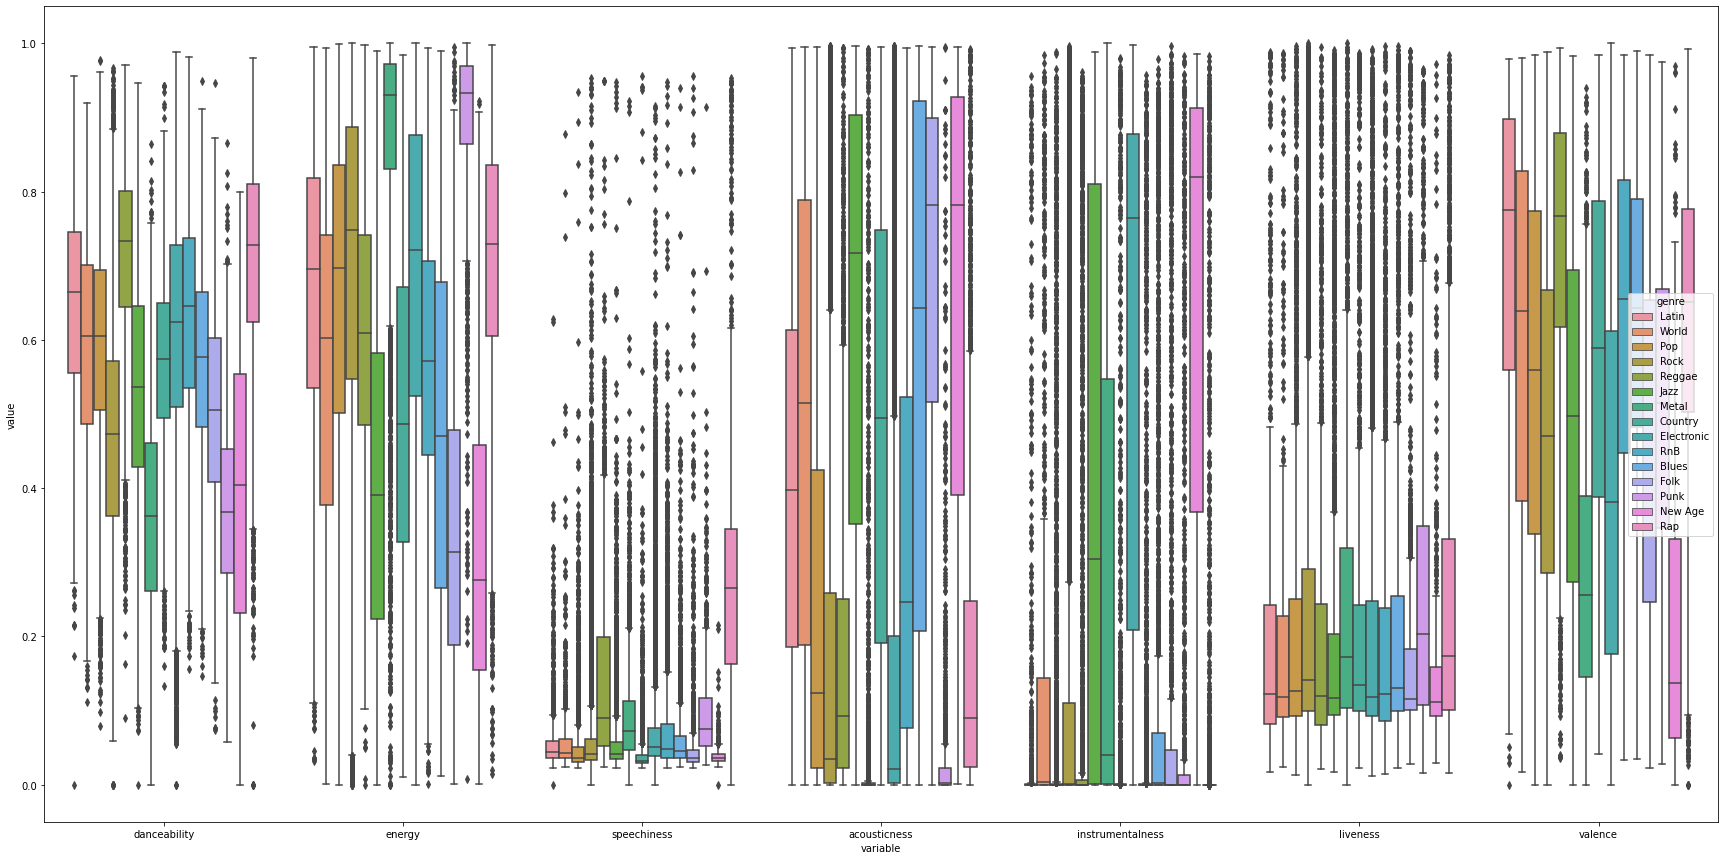

In [13]:
## Create a boxplot per variable and categorized by genre. 
plt.figure(figsize=(30, 15))
sns.boxplot(data=df_stack, x="variable", y="value", hue="genre")


By looking at the boxplots, we see that in some features there are some differences in distribion visible but also a lot of outliers and overlap. Each feature alone is not having clear predictive value. Let's dive a little deeper and look at a pairplot.

<Figure size 1440x720 with 0 Axes>

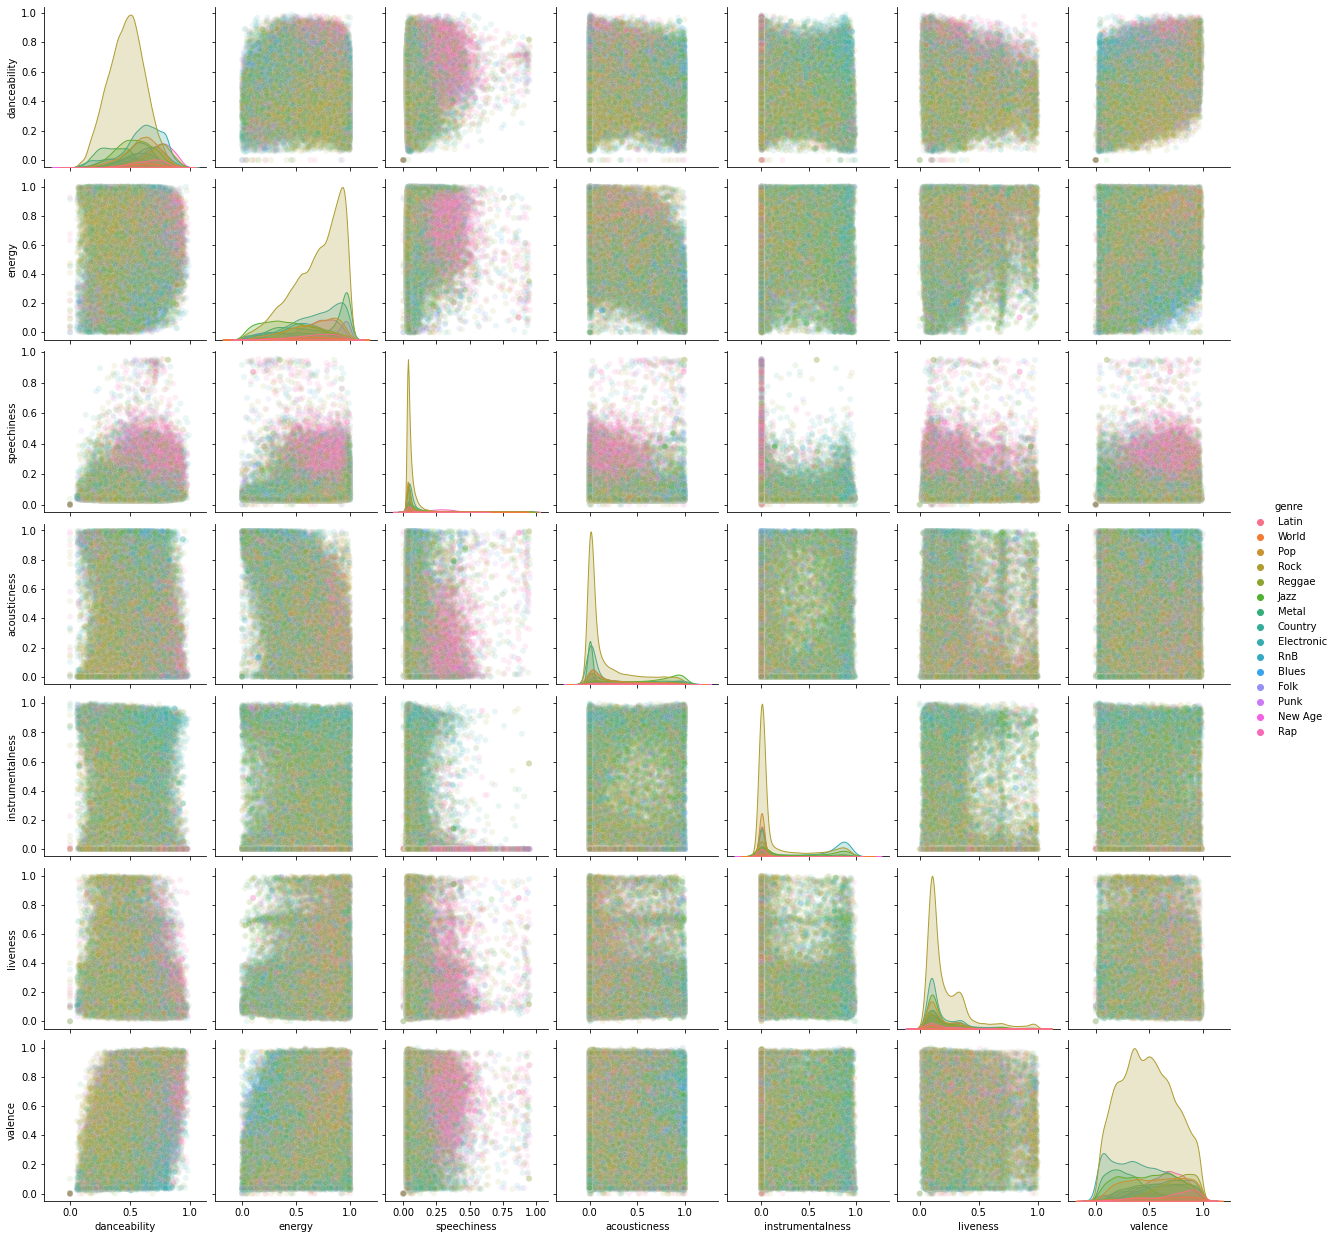

In [14]:
## pairplot to have an overview of pairs of features. 

plt.figure(figsize=(20, 10))
sns.pairplot(data=df_features, hue="genre", kind="scatter", plot_kws={"alpha": 0.1})

The pairplot doesn't really have alot of value since the number of datapoints in most of the plots but in some cases we can distinguish some clusters visually. For example in the speechiness versus energy we clearly see some clusters. 

<AxesSubplot:xlabel='variable', ylabel='value'>

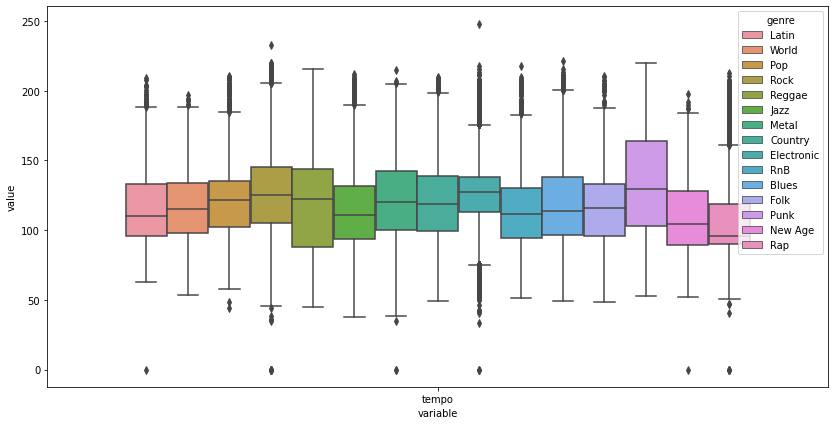

In [22]:
## Boxplot to look at distribution of 'tempo' per 'genre'
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df[["tempo", "genre"]].melt(id_vars="genre"),
    x="variable",
    y="value",
    hue="genre",
)

<H4> When we look at boxplots of tempo per genre, we see that also here the boxes overlap to a great amount. However the medians per genre show some differences. 

<AxesSubplot:xlabel='variable', ylabel='value'>

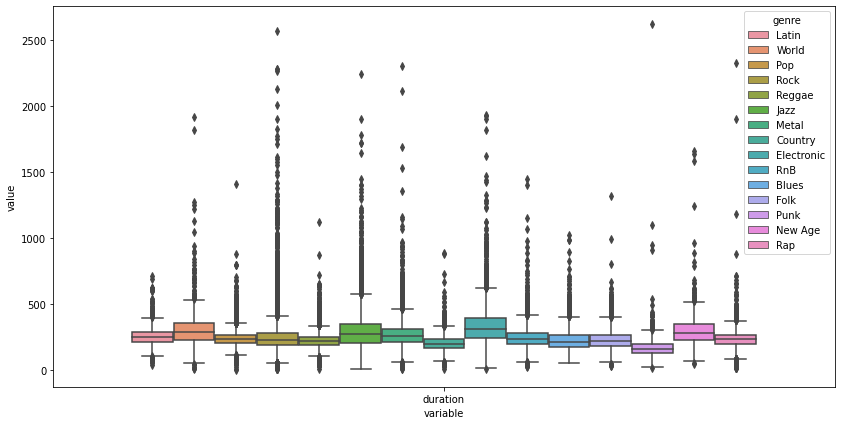

In [23]:
## Boxplot to look at distribution of 'duration' per 'genre'

plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df[["duration", "genre"]].melt(id_vars="genre"),
    x="variable",
    y="value",
    hue="genre",
)

<h4> looking at songs duration, we do see some small differences accros the genres but also a lot of outliers. 

In [40]:
## distribution of 'key'
df[["key"]].value_counts()


key
7      11202
9      10376
0      10333
2      10119
4       7642
1       7244
11      6840
5       6654
10      5548
6       4983
8       4832
3       2387
dtype: int64

<AxesSubplot:xlabel='genre', ylabel='Count'>

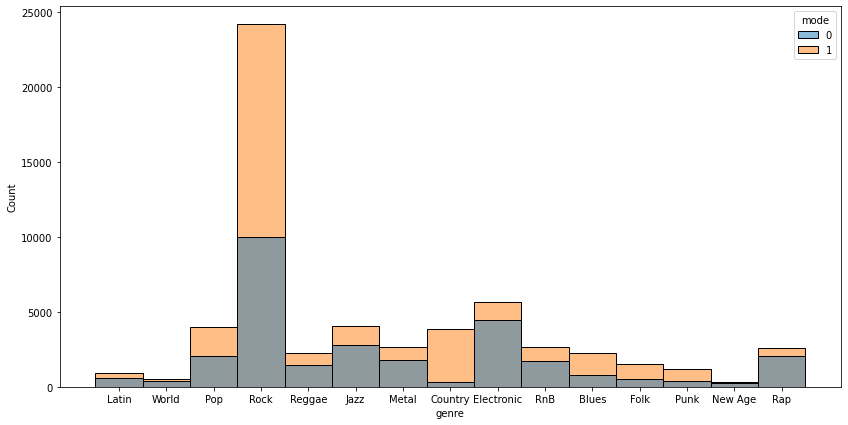

In [27]:
## distribution of mode accross the genres. Mode indicates 'major' or 'minor' where minor = 0. 

plt.figure(figsize=(14, 7))
sns.histplot(data=df[["mode", "genre"]], x="genre", hue="mode")

Also here we do observe some differences across the genres when we look at mode distribution. For example, a country song is almost always in the major modality. 

<AxesSubplot:xlabel='index', ylabel='ratio'>

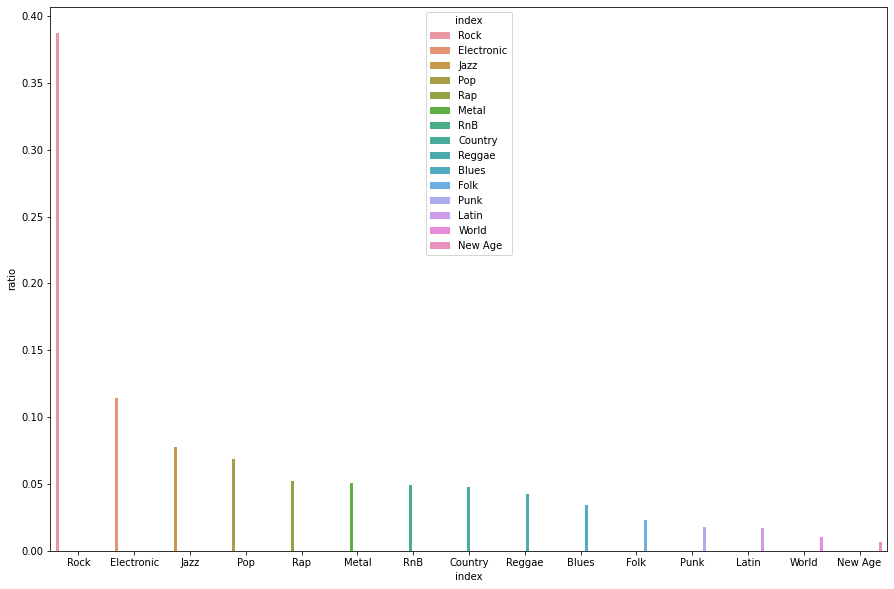

In [39]:
df_genre_counts = df["genre"].value_counts().reset_index()
df_genre_ratios = df["genre"].value_counts(normalize=True).reset_index()

df_genre_counts = df_genre_counts.merge(
    df_genre_ratios, left_index=True, right_index=True, suffixes=("", "_")
)
df_genre_counts.drop(columns=["index_"])
df_genre_counts.columns = ["index", "Genre", "Counts", "ratio"]
df_genre_counts

plt.figure(figsize=(15,10))
sns.barplot(data=df_genre_counts,x='index',y='ratio',hue='index')

When we look at the distribution of Genre's themselves, we see that there is quite a big gap in distribution of these genres. nearly 40% of the songs are classified as rock while only a few hundred tracks are classified as new age.

<h2> Conclusions

<h4> First thought is that the ambition of a 70% accurary score is going to be very ambitious. There is a lot of overlap in the distributions when we visually explore the key features. Our best hopes are that combining many of these feautures may reveal predictive value. We will continue by defining some base models as a starting point for the modelling phase in the next workbook. 
